<a href="https://www.kaggle.com/code/swayampendgaonkar/mnist-from-scratch?scriptVersionId=113889913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data= np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([3, 6, 2, ..., 2, 3, 1])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A =  np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A2), Y))
    return W1,b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[7 7 7 ... 7 1 7] [3 6 2 ... 2 3 1]
Accuracy:  0.0794390243902439
Iteration:  10
[3 7 8 ... 8 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.16229268292682927
Iteration:  20
[3 7 8 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.2348292682926829
Iteration:  30
[3 7 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.3137560975609756
Iteration:  40
[3 7 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.37939024390243903
Iteration:  50
[3 7 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.44109756097560976
Iteration:  60
[3 0 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.49997560975609756
Iteration:  70
[3 0 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.5503658536585366
Iteration:  80
[3 0 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.5916341463414634
Iteration:  90
[3 0 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.624390243902439
Iteration:  100
[3 0 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.6517560975609756
Iteration:  110
[3 0 2 ... 2 7 1] [3 6 2 ... 2 3 1]
Accuracy:  0.6746341463414635
Iteration:  120
[3 0 2 .

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_, A2 = forward_prop(W1, b2, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:,index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ",prediction)
    print("Label: ",label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


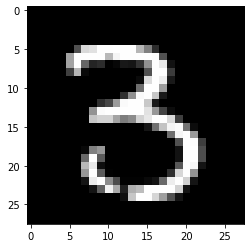

Prediction:  [6]
Label:  6


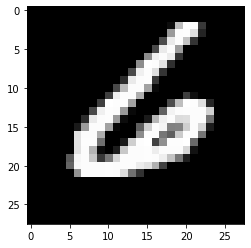

Prediction:  [2]
Label:  2


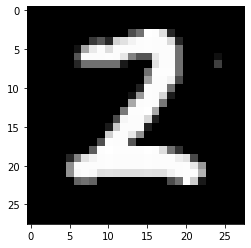

Prediction:  [3]
Label:  3


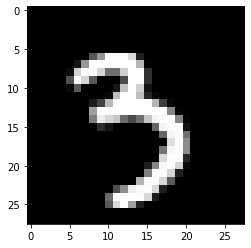

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 8 2 9 1 8 6 3 1 5 6 3 2 6 1 1 1 4 3 0 5 9 4 1 6 8 9 9 2 7 4 8 8 9 2 6 8
 6 7 6 0 2 9 8 9 6 6 1 9 1 6 9 2 5 4 4 7 3 1 9 1 0 4 8 5 2 0 7 2 2 7 0 8 8
 6 3 7 1 8 0 1 9 7 2 8 9 9 5 4 0 7 7 1 1 6 9 7 8 0 3 4 4 1 5 7 6 8 8 4 1 6
 6 3 7 7 1 6 7 7 3 3 8 8 1 8 0 9 0 1 9 1 9 8 1 7 7 6 7 5 5 5 7 1 9 7 3 0 4
 9 3 7 7 8 4 7 8 6 0 8 8 7 1 8 3 5 9 0 6 0 3 6 1 6 6 1 6 8 9 7 8 3 5 6 4 5
 1 3 4 7 7 8 8 8 0 2 8 1 6 4 7 3 2 8 8 7 5 6 9 8 5 6 2 8 8 4 6 3 2 9 0 1 1
 7 7 8 6 6 7 2 3 4 4 6 7 3 5 7 9 9 6 1 9 8 9 8 9 7 9 8 4 8 1 7 5 1 1 2 8 6
 9 7 0 7 1 2 0 6 7 4 6 2 8 8 4 5 6 1 9 0 4 3 6 9 3 8 9 0 0 8 7 0 0 7 4 2 6
 8 3 8 9 3 8 0 7 8 6 0 5 7 8 4 0 7 2 9 4 3 7 5 3 1 2 3 2 0 1 8 7 6 5 9 8 5
 6 4 9 2 1 8 0 0 5 4 8 3 0 6 4 1 3 2 8 1 4 7 8 3 0 7 4 3 7 2 0 0 4 2 7 4 6
 5 3 4 0 4 9 3 6 8 0 6 3 1 7 4 4 6 7 6 5 4 1 2 8 6 2 7 8 8 1 9 1 2 2 7 1 8
 3 4 4 1 8 5 2 6 0 8 0 6 6 3 0 0 8 4 9 0 8 8 3 1 4 9 9 0 2 8 3 5 6 9 0 8 7
 4 7 7 0 4 9 6 9 4 9 3 2 6 3 1 1 8 6 3 3 6 9 4 9 6 1 4 3 8 7 8 0 7 3 5 2 9
 3 1 1 6 7 1 4 1 6 2 9 8 

0.848

In [12]:
# Model has 85.4% accuracy